In [1]:
# Import packages
import numpy as np
import scipy as scp
import sympy as sp
from scipy.integrate import odeint
import time
import matplotlib.pyplot as plt


# Week 0

Euler's method on ODE system:

$\dot{x}=y$

$\dot{y}=-x$

Data visualisation on 

# Software Training workshop

## Lotke-Volterra system of equation:

$\frac{dx}{dt}=\alpha x -\beta xy $

$\frac{dy}{dt}=\delta xy -\gamma y$


### Euler's method:

$x_{i+1}=x_{i}+\eta  (\alpha x -\beta xy)$

$y_{i+1}=y_{i}+\eta (\delta xy -\gamma y)$

In [13]:
# Functions
def dx(x,y):
    return a*x-b*x*y

def dy(x,y):
    return d*x*y-g*y

def ddx(x,y):
    return a-b*y

def ddy(x,y):
    return d*x-g

def algo(eta,x,y):
    start_time=time.time()
    list_x=[]
    list_y=[]
    list_x.append(x)
    list_y.append(y)
    ts=np.arange(0,t,eta)
    for i in range(len(ts)-1):
        x+=eta*dx(x,y)
        y+=eta*dy(x,y)
        list_x.append(x)
        list_y.append(y)
    end_time=time.time()
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(ts,list_x,label='x values')
    plt.plot(ts,list_y,label='y values')
    plt.xlabel('Time')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(list_x,list_y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()
    print('time taken: ', end_time-start_time)
    return



In [3]:
# Initial conditions and parameters
x=1
y=1
a=0.1
b=0.2
d=0.4
g=0.3
t=100

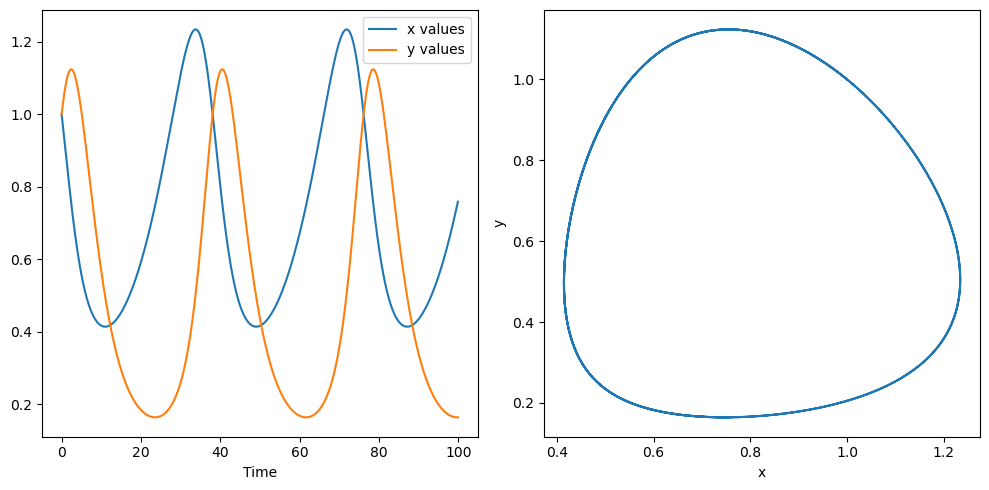

time taken:  0.0010459423065185547


In [14]:
algo(0.1,x,y)

### Runge Kutta method:

$x_{i+1}=x_{i}+\frac{\eta}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})$

where:

$k_{1}=f(x_{i})$

$k_{2}=f(x_{i}+\eta\frac{k_{1}}{2})$

$k_{3}=f(x_{i}+\eta\frac{k_{2}}{2})$

$k_{4}=f(x_{i}+\eta k_{3})$

In [17]:
# Functions
def algo2(eta,x,y):
    start_time=time.time()
    list_x=[]
    list_y=[]
    list_x.append(x)
    list_y.append(y)
    ts=np.arange(0,t,eta)
    for i in range(len(ts)-1):
        k1x=dx(x,y)
        k1y=dy(x,y)
        k2x=dx(x+eta*k1x/2,y+eta*k1y/2)
        k2y=dy(x+eta*k1x/2,y+eta*k1y/2)
        k3x=dx(x+eta*k2x/2,y+eta*k2y/2)
        k3y=dy(x+eta*k2x/2,y+eta*k2y/2)
        k4x=dx(x+eta*k3x,y+eta*k3y)
        k4y=dy(x+eta*k3x,y+eta*k3y)
        x+=eta*(k1x+2*k2x+2*k3x+k4x)/6
        y+=eta*(k1y+2*k2y+2*k3y+k4y)/6
        list_x.append(x)
        list_y.append(y)
    end_time=time.time()
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(ts,list_x,label='x values')
    plt.plot(ts,list_y,label='y values')
    plt.xlabel('Time')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(list_x,list_y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()
    print('time taken: ', end_time-start_time)
    return


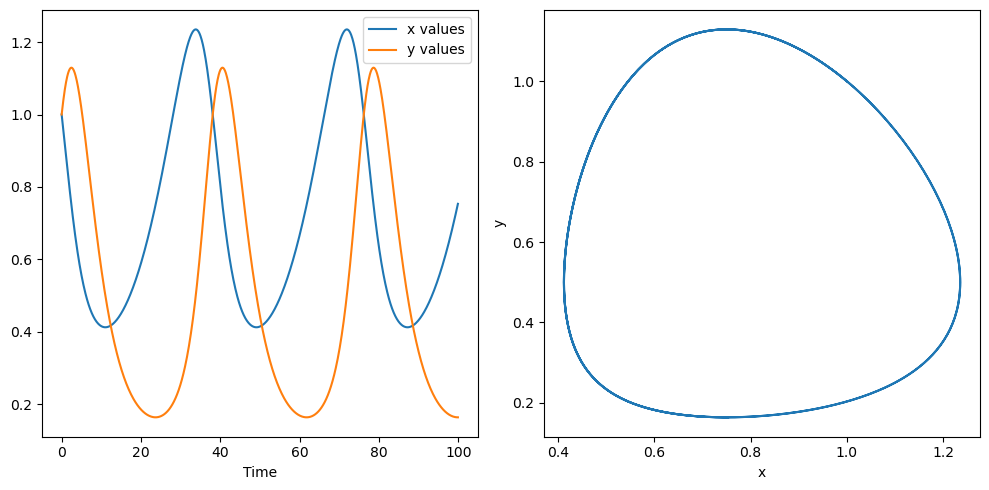

time taken:  0.004965066909790039


In [18]:
algo2(0.1,x,y)

### Scipy.integrate.odeint

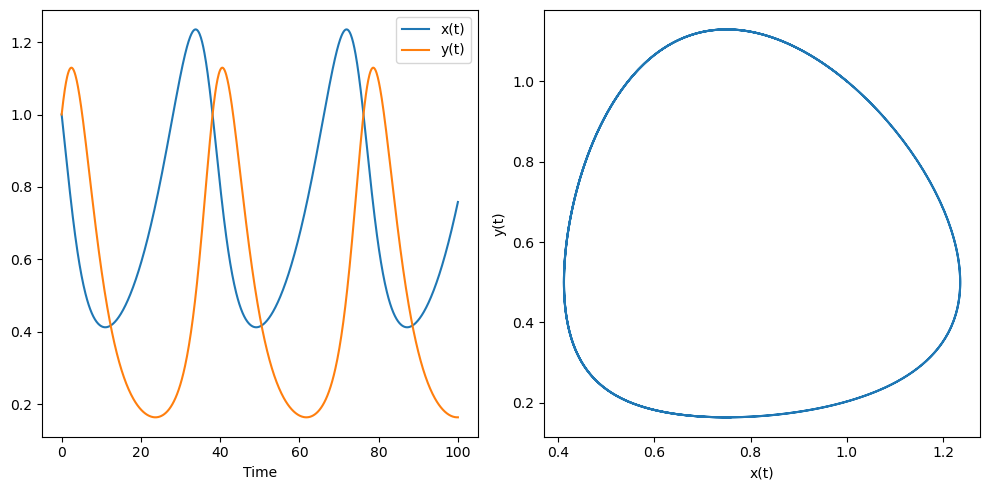

time taken:  0.004075050354003906


In [7]:
# Define the system of ODEs
def dYdt(Y, t, alpha, beta, gamma, delta):
    x, y = Y
    dxdt = alpha*x - beta*x*y
    dydt = delta*x*y - gamma*y
    return [dxdt, dydt]


# Time grid
Time = np.linspace(0, 100, 1000)

# Solve the system of ODEs
start_time=time.time()
solution = odeint(dYdt, [x, y], Time, args=(a,b,g,d))
end_time=time.time()
# Plot the solution
plt.figure(figsize=(10,5))

# Plot x(t) and y(t) against t
plt.subplot(1, 2, 1)
plt.plot(Time, solution[:, 0], label='x(t)')
plt.plot(Time, solution[:, 1], label='y(t)')
plt.legend()
plt.xlabel('Time')

# Plot y against x (Phase plot)
plt.subplot(1, 2, 2)
plt.plot(solution[:, 0], solution[:, 1])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.tight_layout()
plt.show()
print('time taken: ', end_time-start_time)
